# **Fake News Identification: Logistic Regression and SVM**

* This notebook was made by Nick Tran and Nishant Date
* Mining Massive Datasets
* Intro to Machine Learning


In [1]:
import pandas as pd
import sklearn
import numpy as np
#code for Logistic Regression
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures


##Importing Data from Github Raw. Creating Three Dataframes: train, test, and

In [2]:
train_url = 'https://raw.githubusercontent.com/NishantDate/ML_final_project/main/train.tsv'
test_url = 'https://raw.githubusercontent.com/NishantDate/ML_final_project/main/test.tsv'
valid_url = 'https://raw.githubusercontent.com/NishantDate/ML_final_project/main/valid.tsv'
names = ['ID', 'label', 'statement', 'subject(s)', 'speaker', 'speaker title', 'state', 'party', 'barely true', 'false', 'half-true', 'mostly-true', 'pants on fire', 'context']

train = pd.read_csv(train_url, sep='\t', names = names )
test = pd.read_csv(test_url, sep='\t', names = names)
valid = pd.read_csv(valid_url, sep='\t',names = names)

print(train.shape)
print(test.shape)


#encoding labels: See table 1 for results
true_dict = {'pants-fire':0, 'false':0,'barely-true':1, 'half-true':1, 'mostly-true':1, 'true':1}

train['label'] = train['label'].apply(lambda x: true_dict[x] if x in true_dict.keys() else np.nan)
valid['label'] = valid['label'].apply(lambda x: true_dict[x] if x in true_dict.keys() else np.nan)
test['label'] = test['label'].apply(lambda x: true_dict[x] if x in true_dict.keys() else np.nan)

train.head()


(10240, 14)
(1267, 14)


,ID,label,statement,subject(s),speaker,speaker title,state,party,barely true,false,half-true,mostly-true,pants on fire,context
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [3]:
#encoding labels using LabelEncoder: see Table 3 for results

le = preprocessing.LabelEncoder()
train['label'] = le.fit_transform(train['label'])
test['label'] = le.fit_transform(test['label'])
valid['label'] = le.fit_transform(valid['label'])
train.head()

,ID,label,statement,subject(s),speaker,speaker title,state,party,barely true,false,half-true,mostly-true,pants on fire,context
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


Using Logistic Regression


In [4]:
scaler = MinMaxScaler()

def generate_truth(barely_true, false, half_true, mostly_true, pants_on_fire):
  #generates the probability of the speaker telling the truth
  arr = np.array([barely_true, false, half_true, mostly_true, pants_on_fire])
  truths = barely_true + half_true + mostly_true
  total = sum(arr)
  score = truths / total #probability that the speaker will tell the truth
  return score

train['truth_score'] = train.apply(lambda x: generate_truth(x['barely true'],x['false'], x['half-true'], x['mostly-true'], x['pants on fire']), axis = 1)
#train[['truth_score']] = scaler.fit_transform(train[['truth_score']])
test['truth_score'] = test.apply(lambda x: generate_truth(x['barely true'],x['false'], x['half-true'], x['mostly-true'], x['pants on fire']), axis = 1)
#test[['truth_score']] = scaler.fit_transform(test[['truth_score']])
valid['truth_score'] = valid.apply(lambda x: generate_truth(x['barely true'],x['false'], x['half-true'], x['mostly-true'], x['pants on fire']), axis = 1)
#valid[['truth_score']] = scaler.fit_transform(valid[['truth_score']])
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


,ID,label,statement,subject(s),speaker,speaker title,state,party,barely true,false,half-true,mostly-true,pants on fire,context,truth_score
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0.000000
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1.000000
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0.830867
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0.192308
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,0.830769


In [5]:
#Encoding parties -- republican: 0 , democrat: 1, Other:2
true_dict_party = {'republican':0, 'democrat': 1, 'other': 2 }
train['party'] = train['party'].apply(lambda x: true_dict_party[x] if x in true_dict_party.keys() else true_dict_party['other'])
valid['party'] = valid['party'].apply(lambda x: true_dict_party[x] if x in true_dict_party.keys() else true_dict_party['other'])
test['party'] = test['party'].apply(lambda x: true_dict_party[x] if x in true_dict_party.keys() else true_dict_party['other'])
train['state'].value_counts()

Texas                                                1009
Florida                                               997
Wisconsin                                             713
New York                                              657
Illinois                                              556
                                                     ... 
Virginia director, Coalition to Stop Gun Violence       1
Atlanta                                                 1
Virgiia                                                 1
United Kingdom                                          1
Montana                                                 1
Name: state, Length: 84, dtype: int64

In [6]:
#encoding states
number = LabelEncoder()
train['state'] = number.fit_transform(train['state'].astype('str'))
test['state'] = number.fit_transform(test['state'].astype('str'))
valid['state'] = number.fit_transform(valid['state'].astype('str'))       

In [7]:
train.fillna(value = True)
test.fillna(value = True)
valid.fillna(value = True)
train.head()

,ID,label,statement,subject(s),speaker,speaker title,state,party,barely true,false,half-true,mostly-true,pants on fire,context,truth_score
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,62,0,0.0,1.0,0.0,0.0,0.0,a mailer,0.000000
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,69,1,0.0,0.0,1.0,1.0,0.0,a floor speech.,1.000000
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,19,1,70.0,71.0,160.0,163.0,9.0,Denver,0.830867
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,82,2,7.0,19.0,3.0,5.0,44.0,a news release,0.192308
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,13,1,15.0,9.0,20.0,19.0,2.0,an interview on CNN,0.830769


In [8]:
#X_train = train[['barely true','false','half-true','mostly-true', 'pants on fire']]
#X_train = train[['party', 'state', 'barely true','false','half-true','mostly-true', 'pants on fire', 'truth_score']]
X_train = train[['party', 'state', 'truth_score']]
#X_train = train[['truth_score']]

Y_train = train['label']

#X_test = test[['barely true','false','half-true','mostly-true', 'pants on fire']]
#X_test = test[['party', 'state', 'barely true','false','half-true','mostly-true', 'pants on fire', 'truth_score']]
#X_test = test[['party', 'barely true','false','half-true','mostly-true', 'pants on fire']]
X_test = test[['party', 'state', 'truth_score']]
#X_test = test[['truth_score']]
Y_test = test['label']

In [9]:
# Initialize an empty list to store values of test set accuracy.
acc_test = []
acc_train_logreg = []
acc_test_logreg = []

In [10]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

In [11]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model 
# with different values of C.
from sklearn import linear_model
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    # TODO - Create the Logistic Regression model object as described above and save it to logreg - 5 points
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    
    # TODO - Fit the model on the training set - 5 points
    logreg.fit(X_train, Y_train)
    
    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # TODO - Find the prediction on test set - 5 points
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg.append(c)

In [12]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
X_train,Y_train, X_test, Y_test =  X_train.fillna(value= True), Y_train.fillna(value= True), X_test.fillna(value= True), Y_test.fillna(value= True)
for c in cVals:
    logreg_model(c, X_train.fillna(value= True), Y_train.fillna(value= True), X_test.fillna(value= True), Y_test.fillna(value= True))

Accuracy on training data = 0.723242
Accuracy on test data = 0.730860
Accuracy on training data = 0.723242
Accuracy on test data = 0.730860


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.799512
Accuracy on test data = 0.807419
Accuracy on training data = 0.799609
Accuracy on test data = 0.806630


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.799609
Accuracy on test data = 0.808208
Accuracy on training data = 0.799609
Accuracy on test data = 0.808208
Accuracy on training data = 0.799609
Accuracy on test data = 0.808208


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.723242
Accuracy on test data = 0.730860
Accuracy on training data = 0.723242
Accuracy on test data = 0.730860


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.799512
Accuracy on test data = 0.807419
Accuracy on training data = 0.799609
Accuracy on test data = 0.806630


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.799609
Accuracy on test data = 0.808208
Accuracy on training data = 0.799609
Accuracy on test data = 0.808208


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.799609
Accuracy on test data = 0.808208


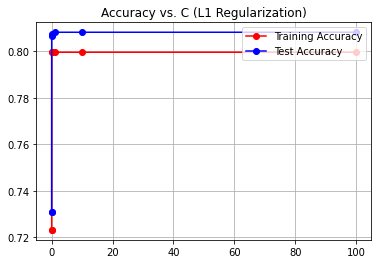

In [13]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.title("Accuracy vs. C (L1 Regularization)")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')
plt.grid()

In [14]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

In [15]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

In [16]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

In [17]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.
    
    # TODO - Create the Logistic Regression model object as described above and save it to logreg2 - 5 points
    logreg2 = linear_model.LogisticRegression(C=c, warm_start=True)

    
    # TODO - Fit the model on the training set - 5 points

    logreg2.fit(X_train, Y_train)

    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg2.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg2
    
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # TODO - Find the prediction on test set - 5 points
    Yhat_test = logreg2.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg2
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg2.append(c)

In [18]:
# Call the above function i.e. logreg_model with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.723242
Accuracy on test data = 0.730860
Accuracy on training data = 0.723242
Accuracy on test data = 0.730860
Accuracy on training data = 0.796094
Accuracy on test data = 0.797948
Accuracy on training data = 0.802734
Accuracy on test data = 0.798737
Accuracy on training data = 0.802441
Accuracy on test data = 0.806630
Accuracy on training data = 0.802441
Accuracy on test data = 0.806630
Accuracy on training data = 0.802441
Accuracy on test data = 0.806630


Accuracy on training data = 0.723242
Accuracy on test data = 0.730860
Accuracy on training data = 0.723242
Accuracy on test data = 0.730860
Accuracy on training data = 0.796094
Accuracy on test data = 0.797948
Accuracy on training data = 0.802734
Accuracy on test data = 0.798737
Accuracy on training data = 0.802441
Accuracy on test data = 0.806630
Accuracy on training data = 0.802441
Accuracy on test data = 0.806630
Accuracy on training data = 0.802441
Accuracy on test data = 0.806630


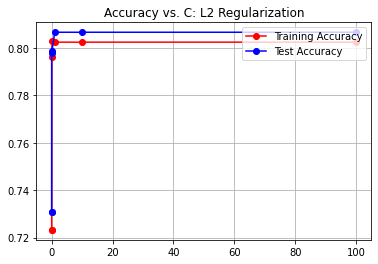

In [19]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

# IMP - Make sure you reinitialize c_logreg2, acc_train_logreg2 and acc_test_logreg2 before rerunning logreg2_model()
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)
plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
# Use the following function to have a legend
plt.title("Accuracy vs. C: L2 Regularization")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.786816
Accuracy on test data = 0.764799


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.786816
Accuracy on test data = 0.764799


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.786816
Accuracy on test data = 0.764799


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.786621
Accuracy on test data = 0.764799


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.786621
Accuracy on test data = 0.764799


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.786621
Accuracy on test data = 0.764799
Accuracy on training data = 0.786816
Accuracy on test data = 0.764799


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


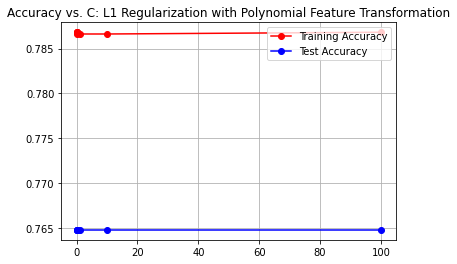

In [20]:
#Polynomial Fit Transformation: L1

poly = PolynomialFeatures(degree =3)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)


plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.title("Accuracy vs. C: L1 Regularization with Polynomial Feature Transformation")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy on training data = 0.788477
Accuracy on test data = 0.789266


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy on training data = 0.787891
Accuracy on test data = 0.789266


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy on training data = 0.788477
Accuracy on test data = 0.785320
Accuracy on training data = 0.787891
Accuracy on test data = 0.789266


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy on training data = 0.787891
Accuracy on test data = 0.789266


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy on training data = 0.787891
Accuracy on test data = 0.789266
Accuracy on training data = 0.787891
Accuracy on test data = 0.785320


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


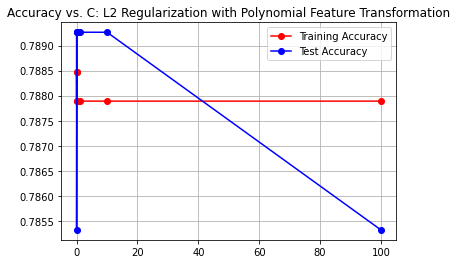

In [21]:
#Polynomial Fit Transformation: L2

poly = PolynomialFeatures(degree =3)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

for c in cVals:
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)

plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
# Use the following function to have a legend
plt.title("Accuracy vs. C: L2 Regularization with Polynomial Feature Transformation")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

### Support Vector Machine (SVM)

### SVM: Linear Kernel

In [22]:
from sklearn import svm

In [23]:
"""
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    # Fit the classifier on the training set 
    svc_linear.fit(X_train, Y_train)
    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    # Adding testing accuracy to acc_train_svm
    acc_train_linear = np.mean(Yhat_svc_linear_train == Y_train) 
    acc_train_svm_linear.append(acc_train_linear)
    print('Train Accuracy = {0:f}'.format(acc_train_linear))
     # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)

# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for c in cVals:
    svm_linear(c)
"""

"\nacc_train_svm_linear = []\nacc_test_svm_linear = []\nc_svm_linear = []\n\ndef svm_linear(c):\n    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) \n    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)\n    # Fit the classifier on the training set \n    svc_linear.fit(X_train, Y_train)\n    # Find the prediction and accuracy on the training set\n    Yhat_svc_linear_train = svc_linear.predict(X_train)\n    # Adding testing accuracy to acc_train_svm\n    acc_train_linear = np.mean(Yhat_svc_linear_train == Y_train) \n    acc_train_svm_linear.append(acc_train_linear)\n    print('Train Accuracy = {0:f}'.format(acc_train_linear))\n     # Find the prediction and accuracy on the test set\n    Yhat_svc_linear_test = svc_linear.predict(X_test)\n    acc_test = np.mean(Yhat_svc_linear_test == Y_test)\n    # Adding testing accuracy to acc_test_svm\n    acc_test_svm_linear.append(acc_test)\n    print('Test Accuracy = {0:f}'.format(acc_test))\n    # A

In [25]:
"""
%matplotlib inline 
plt.plot(c_svm_linear, acc_train_svm_linear, 'ro-') 
plt.plot(c_svm_linear, acc_test_svm_linear,'bo-') 
plt.grid()
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')
"""

"\n%matplotlib inline \nplt.plot(c_svm_linear, acc_train_svm_linear, 'ro-') \nplt.plot(c_svm_linear, acc_test_svm_linear,'bo-') \nplt.grid()\n# Use the following function to have a legend\nplt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')\n"

### SVM: RBF Kernel

In [26]:
#RBF Kernel
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

def svm_rbf(c):
    #Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    #Fit the classifier on the training set 
    svc_rbf.fit(X_train, Y_train)
    #Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_rbf.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    #Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = None
    acc_test = None
    # Adding testing accuracy to acc_test_svm
    Yhat_svc_linear_test = svc_rbf.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    # Appending value of c for graphing purposes
    acc_test_svm_rbf.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    c_svm_rbf.append(c)

# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for c in cVals:
    svm_rbf(c)

Accuracy = 0.723242
Accuracy = 0.730860
Accuracy = 0.723242
Accuracy = 0.730860
Accuracy = 0.723242
Accuracy = 0.730860
Accuracy = 0.723242
Accuracy = 0.730860
Accuracy = 0.723242
Accuracy = 0.730860
Accuracy = 0.786523
Accuracy = 0.788477
Accuracy = 0.798828
Accuracy = 0.805051


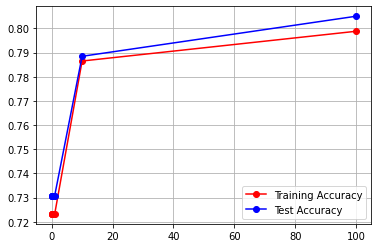

In [27]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm_rbf, acc_train_svm_rbf, 'ro-') 
plt.plot(c_svm_rbf, acc_test_svm_rbf,'bo-') 
plt.grid()
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

### SVM: Polynomial Kernel


In [39]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [45]:
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    A = X_train.iloc[0:300,:]  # First 300 rows of training set.
    B = Y_train.iloc[0:300]  
    C = X_test.iloc[0:100,:]   # First 100 rows of test set.
    D = Y_test.iloc[0:100]
    
    # Fit the classifier on the training set
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A, B)
    #Find the prediction and accuracy on the training set
    Yhat_svc_polynomial_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_polynomial_train == B)
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    #Find the prediction and accuracy on the test set
    Yhat_svc_polynomial_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_polynomial_test == D)
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)

In [46]:
# Call the above function i.e. svm_poly with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
# Redefining cVals because poly takes a long time to run with larger values of c since 
# the larger the value of c, the lesser the amount of regulatization
cVals = np.geomspace(0.000001, 0.001, 5)
for c in cVals:
    svm_polynomial(c)

Train Accuracy = 0.740000
Test Accuracy = 0.730000
Train Accuracy = 0.740000
Test Accuracy = 0.730000
Train Accuracy = 0.740000
Test Accuracy = 0.730000
Train Accuracy = 0.740000
Test Accuracy = 0.730000
Train Accuracy = 0.740000
Test Accuracy = 0.730000


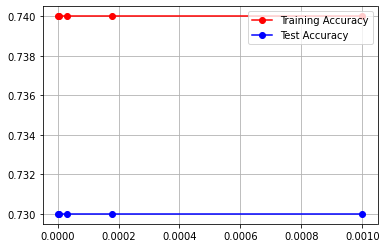

In [47]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm_poly, acc_train_svm_poly, 'ro-') 
plt.plot(c_svm_poly, acc_test_svm_poly,'bo-') 
plt.grid()
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')